# Exploring a DataSet

Now that we have seen the basic pieces of Altair's API, it's time to practice using it to explore a new dataset.
With your partner, choose one of the following three datasets, detailed below.

As you explore the data, recall the building blocks we've discussed:

- various marks: ``mark_point()``, ``mark_line()``, ``mark_tick()``, ``mark_bar()``, ``mark_area()``, ``mark_rect()``, etc.
- various encodings: ``x``, ``y``, ``color``, ``shape``, ``size``, ``row``, ``column``, ``text``, ``tooltip``, etc.
- binning and aggregations: a [List of available aggregations](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation) can be found in Altair's documentation
- stacking and layering (``alt.layer`` <-> ``+``, ``alt.hconcat`` <-> ``|``, ``alt.vconcat`` <-> ``&``)

Start simple and build from there. Which encodings work best with quantitative data? With categorical data?
What can you learn about your dataset using these tools?

We'll set aside about 20 minutes for you to work on this with your partner.

In [2]:
import altair as alt
from vega_datasets import data

## Seattle Weather

This data includes daily precipitation, temperature range, wind speed, and weather type as a function of date between 2012 and 2015 in Seattle.

In [3]:
weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


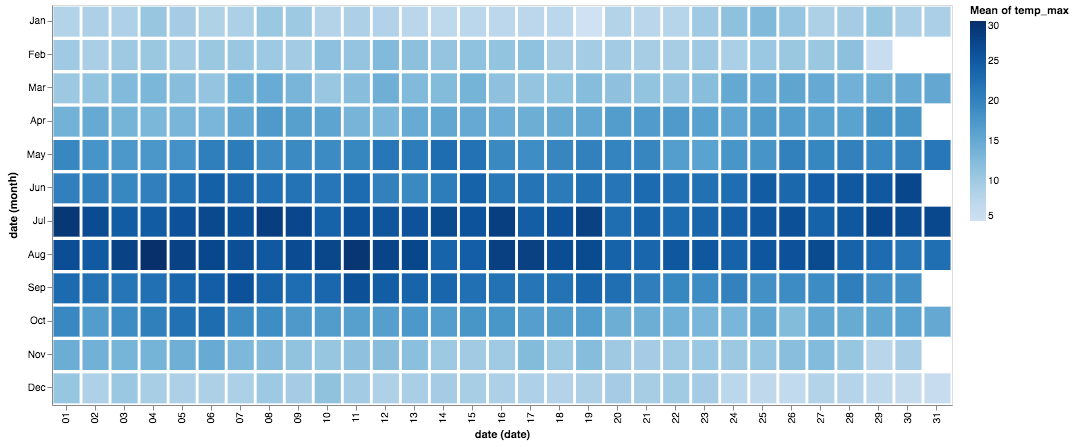

In [4]:
(alt
 .Chart(data=weather,
        height=400, width=900)
 .mark_bar()
 .encode(alt.X('date:O', timeUnit='date'),
         alt.Y('date:O', timeUnit='month'),
         alt.Color('mean(temp_max):Q')
 )
)

## Gapminder

This data consists of population, fertility, and life expectancy over time in a number of countries around the world.

Note that, while you may be tempted to use a temporal encoding for the year, here the year is simply a number, not a date stamp, and so temporal encoding is not the best choice here.

In [5]:
gapminder = data.gapminder()
gapminder.head()

,cluster,country,fertility,life_expect,pop,year
0,0,Afghanistan,7.7,30.332,8891209,1955
1,0,Afghanistan,7.7,31.997,9829450,1960
2,0,Afghanistan,7.7,34.020,10997885,1965
3,0,Afghanistan,7.7,36.088,12430623,1970
4,0,Afghanistan,7.7,38.438,14132019,1975


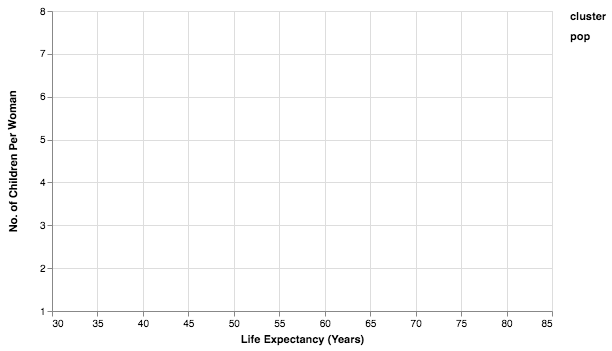

In [8]:
slider = alt.binding_range(min=1955, 
                           max=2005, 
                           step=5)

year = alt.selection_single(name="Select",
                            fields=['year'], 
                            bind=slider,
                           empty='none')

(alt
 .Chart(data=gapminder, width=500)
 .mark_circle()
 .encode(alt.X('life_expect:Q', 
               scale=alt.Scale(zero=False, domain=(30, 85), clamp=True),
               axis=alt.Axis(title='Life Expectancy (Years)')),
         alt.Y('fertility:Q',
               scale=alt.Scale(zero=False, domain=(1, 8), clamp=True),
               axis=alt.Axis(title='No. of Children Per Woman')),
         color='cluster:N',
         size='pop',
         tooltip='country:N')
 .properties(selection=year)
 .transform_filter(year.ref())
)

## Population

This data contains the US population sub-divided by age and sex every decade from 1850 to near the present.

Note that, while you may be tempted to use a temporal encoding for the year, here the year is simply a number, not a date stamp, and so temporal encoding is not the best choice.

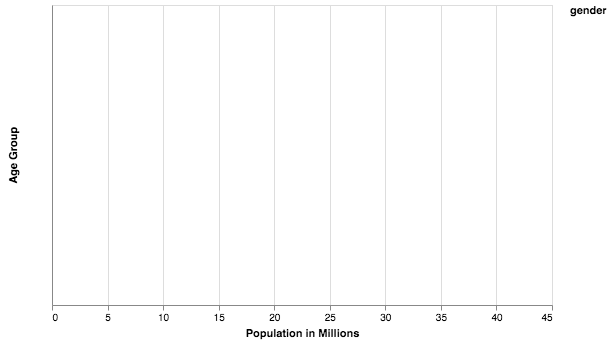

In [44]:
population = data.population()
population.head()

slider = alt.binding_range(min=population.year.min(), 
                           max=population.year.max(), 
                           step=10)

year = alt.selection_single(name="Select",
                            fields=['year'], 
                            bind=slider,
                            empty='none')


(alt
 .Chart(data=(population
              .assign(gender=lambda fr: fr['sex'].map(lambda i: 'Female' if i == 2 else 'Male'))
              .assign(people=lambda fr: fr['people']/10**6)              
             ),
        height=300, 
        width=500)
 .mark_bar(opacity=0.9)
 .encode(alt.X('sum(people):Q', axis=alt.Axis(title='Population in Millions'), scale=alt.Scale(domain=(0, 44))),
         alt.Y('age', bin=True, axis=alt.Axis(title='Age Group')),
         alt.Color('gender:N')) 
 .properties(selection=year)
 .transform_filter(year.ref())
)

## Movies

The movies dataset has data on 3200 movies, including release date, budget, and ratings on IMDB and Rotten Tomatoes.

In [43]:
movies = data.movies()
movies.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,12-Jun-98,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,7-Aug-98,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,28-Aug-98,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,11-Sep-98,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,9-Oct-98,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0
